## Exercise 4.05: Clustering Data Using the k-prototypes Method

In [31]:
import pandas as pd
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

Applying k-prototypes

In [34]:
from kmodes.kprototypes import KPrototypes

In [35]:
cluster_cols = ['Income', 'Education'] 

In [36]:
X = bank_scaled[cluster_cols].values

In [37]:
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols], categorical=[1])

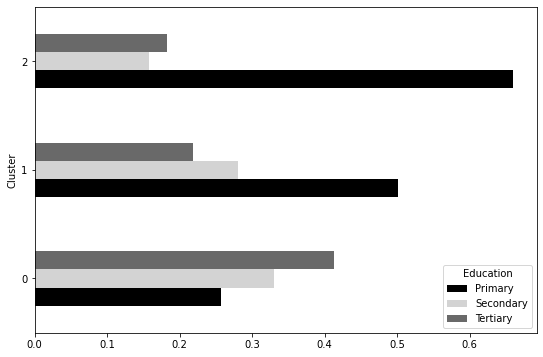

In [38]:
res = bank_scaled.groupby('Cluster')['Education'].\
    value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6], \
                        color=['black','lightgray','dimgray'])
plt.show()